In [1]:
from pathlib import Path
import requests
import pickle
import gzip

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

# 10.195.33.40 - Github
URL = "https://10.195.33.40/pytorch/tutorials/raw/main/_static/"

FILENAME = "mnist.pkl.gz"


with gzip.open((PATH / FILENAME), "rb")  as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")


(50000, 784) 5


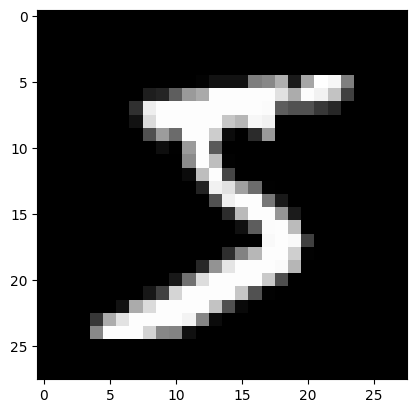

In [2]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")

print(x_train.shape, y_train[0])



In [3]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

n, c = x_train.shape

print(x_train, y_train)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])


In [4]:
print(x_train.shape)

torch.Size([50000, 784])


In [5]:
print(y_train.min(), y_train.max())

tensor(0) tensor(9)


In [6]:
from torch import nn, optim

class AuthorsNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.first_sec = nn.Sequential(
                           nn.Linear(784, 450),
                           nn.ReLU(),
                         )
    self.second_sec = nn.Sequential(
                           nn.Linear(450, 450),
                           nn.ReLU(),
                           nn.Linear(450, 10),
                           nn.Softmax(dim=-1),
                         )

  def forward(self, x):
    return self.second_sec(self.first_sec(x))

auth_nn = AuthorsNN()


In [7]:
auth_nn

AuthorsNN(
  (first_sec): Sequential(
    (0): Linear(in_features=784, out_features=450, bias=True)
    (1): ReLU()
  )
  (second_sec): Sequential(
    (0): Linear(in_features=450, out_features=450, bias=True)
    (1): ReLU()
    (2): Linear(in_features=450, out_features=10, bias=True)
    (3): Softmax(dim=-1)
  )
)

In [8]:
loss_func = nn.CrossEntropyLoss()   
loss_func


CrossEntropyLoss()

In [9]:
from torch import optim
optimizer = optim.Adam(auth_nn.parameters(), lr = 0.01)   
optimizer


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [10]:
def train(num_epochs, ann):
    
    ann.train()
               
    for epoch in range(num_epochs):

            output = ann(x_train)  
            
            loss = loss_func(output, y_train)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            print(epoch, loss.item())
        
    pass


In [11]:
train(100,auth_nn)

0 2.3024163246154785
1 2.2199506759643555
2 2.0942471027374268
3 2.111212730407715
4 2.163724899291992
5 2.162597179412842
6 2.161884307861328
7 2.1542115211486816
8 2.1541249752044678
9 2.154468536376953
10 2.1553730964660645
11 2.1535303592681885
12 2.1524980068206787
13 2.1506640911102295
14 2.150341510772705
15 2.1498641967773438
16 2.150418758392334
17 2.1494061946868896
18 2.148333787918091
19 2.148059129714966
20 2.148944139480591
21 2.1459858417510986
22 2.145104169845581
23 2.1469643115997314
24 2.1611480712890625
25 2.1623787879943848
26 2.14812970161438
27 2.1510374546051025
28 2.1522912979125977
29 2.151017904281616
30 2.149554491043091
31 2.148862838745117
32 2.1491920948028564
33 2.1492996215820312
34 2.148433208465576
35 2.1475563049316406
36 2.147329807281494
37 2.147181749343872
38 2.146954298019409
39 2.146125555038452
40 2.145778179168701
41 2.1451966762542725
42 2.144024610519409
43 2.1436994075775146
44 2.1426970958709717
45 2.1418497562408447
46 2.140514612197876


In [12]:
class Adversary(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers= nn.Sequential(
                      nn.Linear(450, 800),
                      nn.ReLU(),
                      nn.Linear(800, 784),
                    )
 
  def forward(self, x):
    return self.layers(x)



In [13]:
adversary = Adversary()
optimiser = optim.Adam(adversary.parameters(), lr=1e-4)


for i in range (0,1000):
    optimiser.zero_grad()
    #print(x_train[i])
    target_outputs  = auth_nn.first_sec(x_valid[i])
    adversary_outputs = adversary(target_outputs)
    #print(adversary_outputs)
    loss = ((x_valid[i] - adversary_outputs)**2).mean()
    #print(loss.item())
    loss.backward()
    optimiser.step()


In [14]:
for i in range (1000,2000):
    target_outputs = auth_nn.first_sec(x_train[i])
    recreated_data = adversary(target_outputs)
    #print(recreated_data)
   


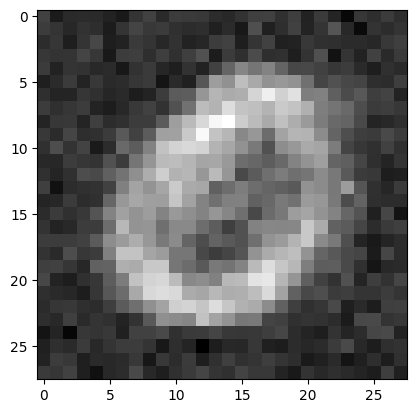

In [15]:
with torch.no_grad():
        pyplot.imshow(recreated_data.reshape((28, 28)), cmap="gray")
